In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load the data
observations = pd.read_csv('observations.csv')
species_info = pd.read_csv('species_info.csv')
print(species_info.head())
print(observations.head())


  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               

In [3]:
print(observations.describe())
print(species_info.describe())
print(species_info.category.unique())
print(observations.park_name.unique())
print(species_info.conservation_status.unique()) 


       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000
              category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4470                  3                   7   

       conservation_status  
count                  191  
unique                   4  
top     Species of Concern  
freq                   161  
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [4]:
#is there any NaN values? 
print(observations.isna().value_counts()) #no NaN
print(species_info.isna().value_counts()) #there are a lot of NaN values in column conservation_status, probably because these creatures are not concerved
species_info = species_info.fillna('Least concern') #change NaN to 'Least concern'

#check for duplicates
print(observations.duplicated().value_counts()) #there are duplicates
print(species_info.duplicated().value_counts()) #no duplicates
observations = observations.drop_duplicates() #delete duplicates

#merge two tables
all_data = pd.merge(observations, species_info, how = 'left', on = 'scientific_name')
print(all_data.head())

scientific_name  park_name  observations
False            False      False           23296
dtype: int64
category  scientific_name  common_names  conservation_status
False     False            False         True                   5633
                                         False                   191
dtype: int64
False    23281
True        15
dtype: int64
False    5824
dtype: int64
            scientific_name                            park_name  \
0        Vicia benghalensis  Great Smoky Mountains National Park   
1            Neovison vison  Great Smoky Mountains National Park   
2         Prunus subcordata               Yosemite National Park   
3      Abutilon theophrasti                  Bryce National Park   
4  Githopsis specularioides  Great Smoky Mountains National Park   

   observations        category                        common_names  \
0            68  Vascular Plant  Purple Vetch, Reddish Tufted Vetch   
1            77          Mammal                       American 

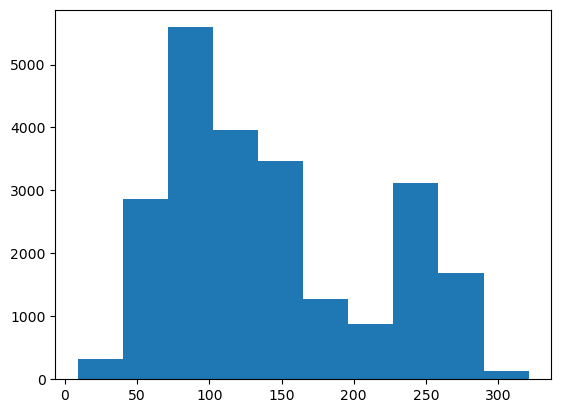

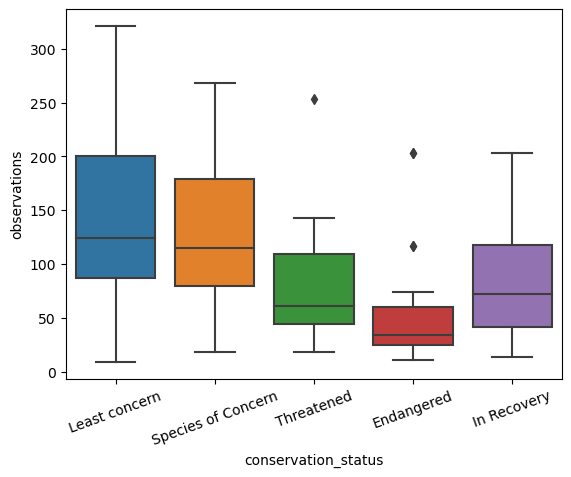

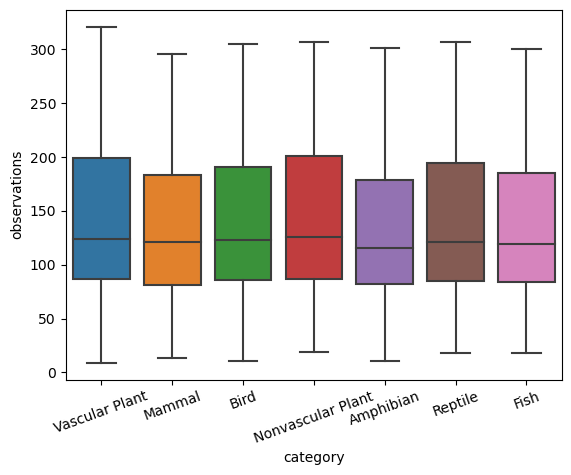

<Figure size 640x480 with 0 Axes>

In [5]:
#distribution of observations
plt.hist(observations.observations)
plt.show()
plt.clf() #it is right-skewed 

#boxplot of observations for each conserv status
ax = sns.boxplot(x = 'conservation_status', y='observations', data = all_data)
ax.tick_params(axis = 'x', labelrotation = 20)
plt.show()
plt.clf() #most observations are of least concerned and least observations are fo endangered. BUT some of least concerned have even less observations than endangered, probably NaN values were not just least concerned but also no information
#lets perform a statictical test? 


#boxplots of observations for each category
ax = sns.boxplot(x = 'category', y = 'observations', data = all_data)
ax.tick_params(axis = 'x', labelrotation = 20)
plt.show()
plt.clf() #all of them are observed equally, so there no category that are endangered more than others

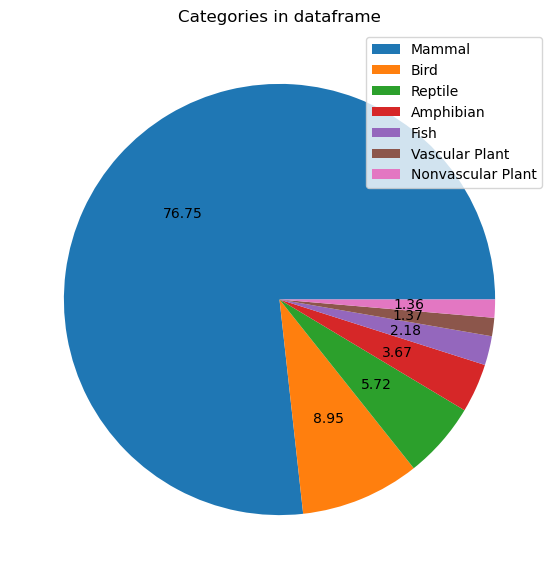

<Figure size 640x480 with 0 Axes>

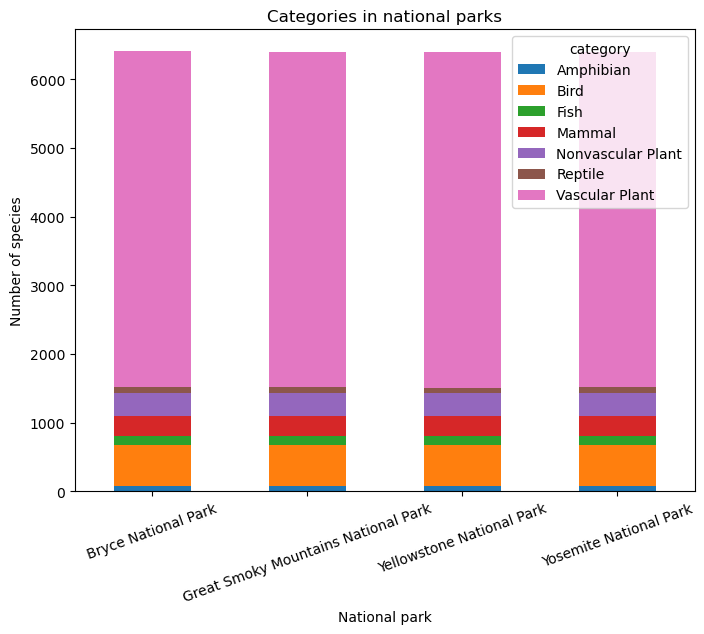

<Figure size 640x480 with 0 Axes>

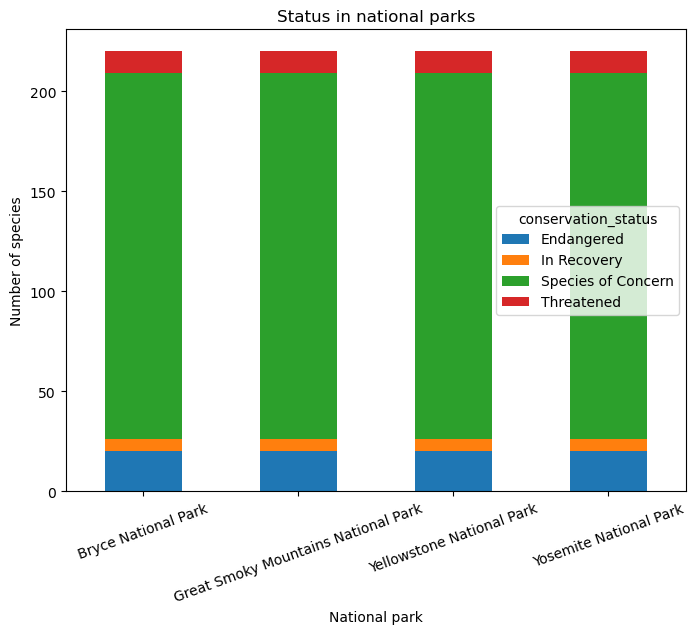

<Figure size 640x480 with 0 Axes>

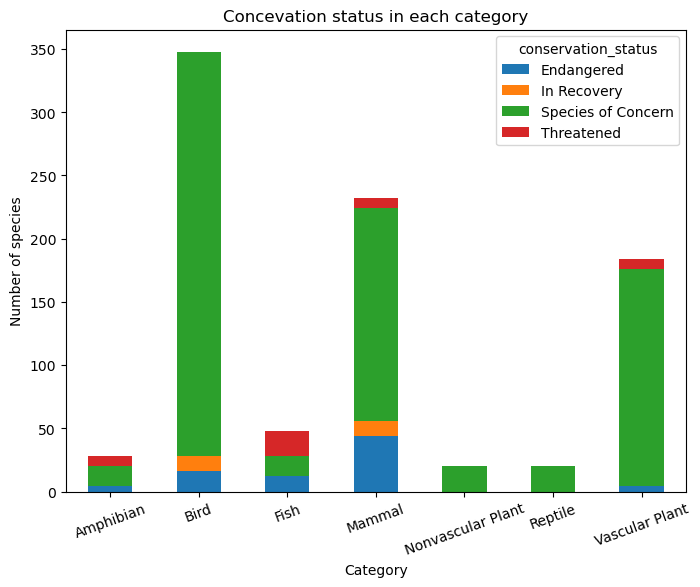

<Figure size 640x480 with 0 Axes>

In [92]:
#which category is the most common in our dataset?
plt.figure(figsize = (20, 7))
plt.pie(species_info.category.value_counts(), autopct='%.2f')
plt.title('Categories in dataframe')
plt.legend(species_info.category.unique())
plt.show()
plt.clf() #there are the most of mammals, also piechart not the best idea, because there are too much categories, but it is still readable

#% of categories in national parks
category_park = all_data.loc[:, ['park_name', 'category', 'scientific_name']].groupby(['park_name', 'category']).scientific_name.count().unstack()
ax = category_park.plot(kind = 'bar', figsize = (8, 6), stacked = True)
ax.tick_params(axis = 'x', labelrotation = 20)
plt.title('Categories in national parks')
plt.xlabel('National park')
plt.ylabel('Number of species')
plt.show()
plt.clf() # not so useful, all parks have the same species

#% of each concerved status of concerved species in national parks
status_park = all_data.loc[all_data.conservation_status != 'Least concern', ['park_name', 'conservation_status', 'scientific_name']].groupby(['park_name', 'conservation_status']).scientific_name.count().unstack()
ax = status_park.plot(kind = 'bar', figsize = (8, 6), stacked = True)
ax.tick_params(axis = 'x', labelrotation = 20)
plt.title('Status in national parks')
plt.xlabel('National park')
plt.ylabel('Number of species')
plt.show()
plt.clf() #not so useful, all parks have the same species

#how much species have which concervation status in each category
category_status = all_data.loc[all_data.conservation_status != 'Least concern', ['category', 'conservation_status', 'scientific_name']].groupby(['category', 'conservation_status']).scientific_name.count().unstack()
ax = category_status.plot(kind = 'bar', figsize = (8, 6), stacked = True)
ax.tick_params(axis = 'x', labelrotation = 20)
plt.title('Conсevation status in each category')
plt.xlabel('Category')
plt.ylabel('Number of species')
plt.show() #birds are most with conservation status, but mammals are most endangered
plt.clf()

           genus  number
0         Myotis      15
1          Canis       5
2          Falco       4
3           Rana       3
4  Lasionycteris       2
5    Sphyrapicus       2
6     Nycticorax       2
7   Oncorhynchus       2
8          Gavia       2
9        Pandion       2


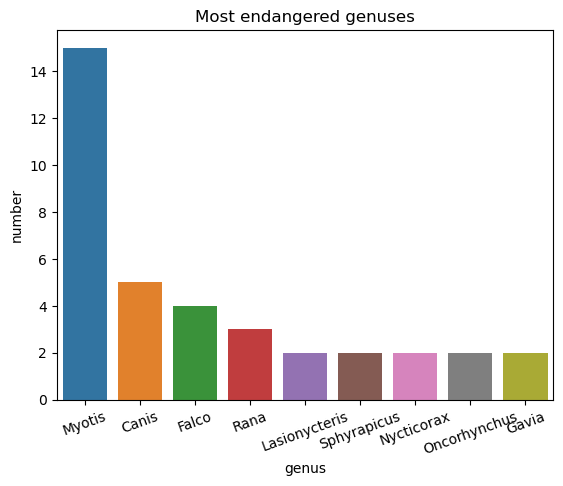

<Figure size 640x480 with 0 Axes>

In [96]:
#which genus is the most threathened?
species_info['genus'] = species_info.scientific_name.str.split(' ').str.get(0)
threathened_genus = species_info.loc[species_info.conservation_status != 'Least concern', ['genus', 'scientific_name']].groupby('genus').scientific_name.count().sort_values(ascending=False).reset_index(name = 'number')
print(threathened_genus.head(10)) #most threathened genuses are Myotis (bats), canis (wolves), falco (falcons) and rana (frogs). That is why protection of bats is so important. In my country there are a whole organization just for bat protection.

ax = sns.barplot(threathened_genus[0:9], x = 'genus', y = 'number')
ax.tick_params(axis = 'x', labelrotation = 20)
plt.title('Most endangered genuses')
plt.show()
plt.clf()

In [95]:
#Which species has the most common names?
species_info['names_count'] = species_info.common_names.str.split(',').str.len()
names =  species_info.loc[:, ['scientific_name', 'names_count']].sort_values('names_count', ascending = False)
print(names.head()) # 11 names just for 1 flower! 

        scientific_name  names_count
3562  Tragopogon dubius           11
5618  Panicum miliaceum           10
3975  Verbascum thapsus            9
5216     Galium aparine            9
4255  Panicum capillare            9
